In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from typing import Tuple, List

In [2]:
nRowsRead = None # specify 'None' if want to read whole file
# model_2015_ST4000DM000.csv has 1243993 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('../input/model_2015_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'model_2015_ST4000DM000.csv'
df_ = pd.read_csv('../input/model_2016_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
df_.dataframeName = 'model_2016_ST4000DM000.csv'
df = pd.concat([df,df_],sort = False)
df_ = pd.read_csv('../input/model_2017_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
df_.dataframeName = 'model_2017_ST4000DM000.csv'
df = pd.concat([df,df_],sort = False)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2498362 rows and 95 columns


In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.498362e+06,2.498362e+06,2.498346e+06,2.498346e+06,0.0,0.0,2.498346e+06,2498346.0,2.498346e+06,2.498346e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000763e+12,4.652008e-02,1.152780e+02,1.215187e+08,NaN,NaN,9.461162e+01,0.0,9.999992e+01,8.120367e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.803071e+09,2.106086e-01,3.863430e+00,7.042538e+07,NaN,NaN,2.870004e+00,0.0,9.080076e-03,1.483009e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,NaN,NaN,9.100000e+01,0.0,9.900000e+01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000e+00,1.140000e+02,6.003993e+07,NaN,NaN,9.200000e+01,0.0,1.000000e+02,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000e+00,1.170000e+02,1.210625e+08,NaN,NaN,9.500000e+01,0.0,1.000000e+02,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000e+00,1.180000e+02,1.825666e+08,NaN,NaN,9.700000e+01,0.0,1.000000e+02,1.000000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000e+00,1.200000e+02,2.441401e+08,NaN,NaN,1.000000e+02,0.0,1.000000e+02,1.216000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498362 entries, 0 to 178297
Data columns (total 95 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   serial_number         object 
 2   model                 object 
 3   capacity_bytes        int64  
 4   failure               int64  
 5   smart_1_normalized    float64
 6   smart_1_raw           float64
 7   smart_2_normalized    float64
 8   smart_2_raw           float64
 9   smart_3_normalized    float64
 10  smart_3_raw           float64
 11  smart_4_normalized    float64
 12  smart_4_raw           float64
 13  smart_5_normalized    float64
 14  smart_5_raw           float64
 15  smart_7_normalized    float64
 16  smart_7_raw           float64
 17  smart_8_normalized    float64
 18  smart_8_raw           float64
 19  smart_9_normalized    float64
 20  smart_9_raw           float64
 21  smart_10_normalized   float64
 22  smart_10_raw          float64
 23  smart_11_norm

In [6]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis = 0, how = 'all')
df_cleaned.drop(list(df_cleaned.filter(regex = 'normalized')), axis = 1, inplace = True)
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned.describe()

,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,smart_184_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,2.498362e+06,2.498362e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,...,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06,2.498346e+06
mean,4.000763e+12,4.652008e-02,1.215187e+08,8.120367e+00,6.201247e+00,3.296333e+10,1.065894e+04,9.248857e+00,1.864320e+00,7.214773e-03,...,2.548116e+01,2.335623e+00,2.257093e+04,2.548116e+01,4.139263e-01,4.139263e-01,2.766941e+00,2.834662e+13,2.081268e+10,8.569844e+10
std,9.803071e+09,2.106086e-01,7.042538e+07,1.483009e+01,2.620996e+02,2.716049e+12,7.665135e+03,1.614178e+02,1.063162e+02,2.451060e-01,...,4.977314e+00,1.357049e+01,3.460693e+04,4.977314e+00,2.744172e+01,2.744172e+01,9.464349e+01,6.712599e+13,8.069589e+09,8.562021e+10
min,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.300000e+01,0.000000e+00,2.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.641000e+03
25%,4.000787e+12,0.000000e+00,6.003993e+07,3.000000e+00,0.000000e+00,1.440064e+08,4.058000e+03,3.000000e+00,0.000000e+00,0.000000e+00,...,2.200000e+01,0.000000e+00,4.665000e+03,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.977000e+03,1.565540e+10,5.354998e+09
50%,4.000787e+12,0.000000e+00,1.210625e+08,6.000000e+00,0.000000e+00,2.862602e+08,9.152000e+03,5.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e+01,0.000000e+00,1.249100e+04,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.517000e+03,2.069689e+10,6.247602e+10
75%,4.000787e+12,0.000000e+00,1.825666e+08,1.000000e+01,0.000000e+00,5.644145e+08,1.565200e+04,1.000000e+01,0.000000e+00,0.000000e+00,...,2.900000e+01,2.000000e+00,3.063900e+04,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.450100e+04,2.549102e+10,1.428917e+11
max,4.000787e+12,1.000000e+00,2.441401e+08,1.216000e+03,6.472000e+04,2.814717e+14,3.965200e+04,1.641600e+04,2.106000e+04,3.900000e+01,...,4.500000e+01,1.208000e+03,6.456800e+05,4.500000e+01,1.566400e+04,1.566400e+04,5.415000e+03,2.814707e+14,5.302359e+10,6.463693e+11


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498362 entries, 0 to 178297
Data columns (total 25 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   serial_number   object 
 2   capacity_bytes  int64  
 3   failure         int64  
 4   smart_1_raw     float64
 5   smart_4_raw     float64
 6   smart_5_raw     float64
 7   smart_7_raw     float64
 8   smart_9_raw     float64
 9   smart_12_raw    float64
 10  smart_183_raw   float64
 11  smart_184_raw   float64
 12  smart_187_raw   float64
 13  smart_188_raw   float64
 14  smart_189_raw   float64
 15  smart_190_raw   float64
 16  smart_192_raw   float64
 17  smart_193_raw   float64
 18  smart_194_raw   float64
 19  smart_197_raw   float64
 20  smart_198_raw   float64
 21  smart_199_raw   float64
 22  smart_240_raw   float64
 23  smart_241_raw   float64
 24  smart_242_raw   float64
dtypes: float64(21), int64(2), object(2)
memory usage: 495.6+ MB


In [8]:
df_cleaned.head()

,date,serial_number,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2015-01-01,Z300YN6R,4000787030016,0,134283496.0,3.0,0.0,74635687.0,1641.0,3.0,...,22.0,2.0,2443.0,22.0,0.0,0.0,0.0,1.624000e+03,8.441971e+09,2.469779e+10
1,2015-01-01,W300T09N,4000787030016,0,235812736.0,14.0,0.0,138184468.0,3534.0,14.0,...,27.0,2.0,115041.0,27.0,0.0,0.0,0.0,2.311122e+13,1.025090e+10,2.269857e+10
2,2015-01-01,Z3025923,4000787030016,1,159417104.0,1.0,0.0,86152902.0,1350.0,1.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.350000e+03,8.734935e+09,2.309538e+10
3,2015-01-01,Z300GPJ7,4000787030016,0,25333728.0,10.0,0.0,131298458.0,12845.0,10.0,...,29.0,5.0,13967.0,29.0,0.0,0.0,0.0,1.436581e+14,2.187359e+10,1.156925e+11
4,2015-01-01,Z300VALY,4000787030016,0,139107936.0,4.0,0.0,691675817.0,9366.0,3.0,...,27.0,1.0,6163.0,27.0,0.0,0.0,0.0,1.703169e+14,1.840603e+10,4.845404e+10


In [9]:
df_cleaned = df_cleaned.drop(columns=['capacity_bytes'])
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498346 entries, 0 to 178297
Data columns (total 24 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   serial_number  object 
 2   failure        int64  
 3   smart_1_raw    float64
 4   smart_4_raw    float64
 5   smart_5_raw    float64
 6   smart_7_raw    float64
 7   smart_9_raw    float64
 8   smart_12_raw   float64
 9   smart_183_raw  float64
 10  smart_184_raw  float64
 11  smart_187_raw  float64
 12  smart_188_raw  float64
 13  smart_189_raw  float64
 14  smart_190_raw  float64
 15  smart_192_raw  float64
 16  smart_193_raw  float64
 17  smart_194_raw  float64
 18  smart_197_raw  float64
 19  smart_198_raw  float64
 20  smart_199_raw  float64
 21  smart_240_raw  float64
 22  smart_241_raw  float64
 23  smart_242_raw  float64
dtypes: float64(21), int64(1), object(2)
memory usage: 476.5+ MB


In [10]:
for key in df_cleaned.loc[:,'smart_1_raw':].columns:
    df_cleaned[key] = pd.cut(x = list(df_cleaned[key]), bins = 10, labels = [0,1,2,3,4,5,6,7,8,9])

In [11]:
group = df_cleaned.groupby('serial_number')
group.size()

serial_number
S3000FZ5    121
S3000QAP    121
S30015PW    121
S3001FPA    121
S3002DLG    120
           ... 
Z307N7AG     81
Z307PHYM     37
Z307PR88     38
Z307T2A4     71
Z307XHRJ     81
Length: 19988, dtype: int64

In [12]:
failure_grp = group.filter(lambda x : x['failure'].sum() > 0).groupby('serial_number')
success_grp = group.filter(lambda x : x['failure'].sum() <= 0).groupby('serial_number')

In [13]:
failure_df = group.filter(lambda x : x['failure'].sum() > 0)
success_df = group.filter(lambda x : x['failure'].sum() <= 0)

In [14]:
def split_dataset(df: pd.DataFrame, key: str = 'serial_number') -> Tuple[pd.DataFrame, pd.DataFrame]:
    keys_set = df[key].unique()
    keys_train, keys_test = train_test_split(keys_set)
    df_train, df_test = df[df[key].isin(keys_train)], df[df[key].isin(keys_test)]
    df_train = df_train.sort_values(by='date')
    df_test = df_test.sort_values(by='date')
    return df_train, df_test

In [15]:
def group_to_hmminput(df : pd.DataFrame) -> Tuple[np.ndarray,List[int]]:
    grouped = df.groupby('serial_number')
    sequence = []
    lengths = []
    for name, group in grouped:
        len = 0
        for idx, row in group.iterrows():
            sequence.append(list(row['smart_1_raw':]))
            len += 1
        lengths.append(len)
    return np.array(sequence), lengths

In [16]:
success_train, success_test = split_dataset(success_df)
success_train, success_train_len = group_to_hmminput(success_train)
success_test, success_test_len = group_to_hmminput(success_test)

In [17]:
failure_train, failure_test = split_dataset(failure_df)
failure_train, failure_train_len = group_to_hmminput(failure_train)
failure_test, failure_test_len = group_to_hmminput(failure_test)

In [19]:
from hmmlearn import hmm

In [20]:
model1 = hmm.CategoricalHMM(n_components = 5,n_iter = 5)
model1.fit(failure_train, failure_train_len)

CategoricalHMM(n_components=5, n_features=10, n_iter=5,
               random_state=RandomState(MT19937) at 0x7F11E4110440)

In [21]:
model2 = hmm.CategoricalHMM(n_components = 5, n_iter = 5)
model2.fit(success_train[:sum(success_train_len[:len(failure_train_len)])], success_train_len[:len(failure_train_len)])

CategoricalHMM(n_components=5, n_features=10, n_iter=5,
               random_state=RandomState(MT19937) at 0x7F11E4110440)

In [22]:
# true_label = [1]*len(failure_test_len)+[0]*len(success_test_len)
true_label = [1]*len(failure_test_len)+[0]*len(failure_test_len)
pred_label = []

In [23]:
def split_concatenated_arrays(concatenated_list, lengths):
    original_arrays = []
    start = 0

    for length in lengths:
        end = start + length
        original_arrays.append(concatenated_list[start:end])
        start = end

    return original_arrays

In [24]:
failure_testset = split_concatenated_arrays(failure_test,failure_test_len)
success_testset = split_concatenated_arrays(success_test,success_test_len[:len(failure_test_len)])

In [25]:
# np.average([model1.score(disk)  - model2.score(disk) for disk in failure_testset]), np.average([abs(model1.score(disk)  - model2.score(disk)) for disk in failure_testset])

In [26]:
# np.average([model1.score(disk)  - model2.score(disk) for disk in success_testset]), np.average([abs(model1.score(disk)  - model2.score(disk)) for disk in success_testset])

In [27]:
for disk in failure_testset:
    if(model1.score(disk) - model2.score(disk) > 0):
        pred_label.append(1)
    else:
        pred_label.append(0)
        
for disk in success_testset:
    if(model1.score(disk) - model2.score(disk) > 0):
        # print(model1.score(disk) - model2.score(disk))
        pred_label.append(1)
    else:
        pred_label.append(0)

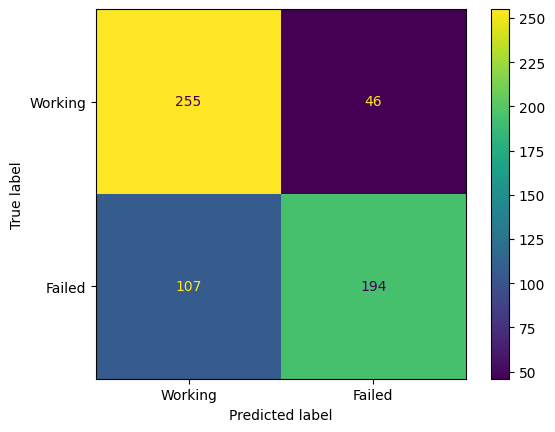

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
conf = confusion_matrix(true_label , pred_label)
ConfusionMatrixDisplay(
conf,display_labels = ['Working','Failed']
).plot()

In [29]:
print(classification_report(true_label , pred_label))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       301
           1       0.81      0.64      0.72       301

    accuracy                           0.75       602
   macro avg       0.76      0.75      0.74       602
weighted avg       0.76      0.75      0.74       602

